In [ ]:
!unrar x "/content/drive/MyDrive/leaves_new.rar" 


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/drive/MyDrive/leaves_new.rar

Creating    leaves_new                                                OK
Creating    leaves_new/test                                           OK
Creating    leaves_new/test/alstonia                                  OK
Extracting  leaves_new/test/alstonia/0003_0001.JPG                         0%  OK 
Extracting  leaves_new/test/alstonia/0003_0003.JPG                         0%  OK 
Extracting  leaves_new/test/alstonia/0003_0004.JPG                         0%  OK 
Extracting  leaves_new/test/alstonia/0003_0005.JPG                         0%  OK 
Extracting  leaves_new/test/alstonia/0003_0006.JPG                         0%  OK 
Extracting  leaves_new/test/alstonia/0003_0007.JPG                         0%  OK 
Extracting  leaves_new/test/alstonia/0003_0008.JPG                         0%  OK 
Extrac

In [ ]:
import pandas as pd
import glob
import cv2
import os
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot as plt
import time

In [ ]:
print(os.listdir("/content/leaves_new"))

['test', 'train']


In [ ]:
train_images = []
train_labels = [] 
size = 256

In [ ]:
for directory_path in glob.glob("leaves_new/train/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*")):
        print(img_path)
        img = cv2.imread(img_path)
        if img is None:
            print('Wrong path:', img_path)
        else:
            img = cv2.resize(img, (size, size))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img1=cv2.normalize(img,None,0,1.0,cv2.NORM_MINMAX,dtype=cv2.CV_32F)
            train_images.append(img1)
            train_labels.append(label)

chinar
leaves_new/train/chinar/aug_ch_23_3418..jpg
leaves_new/train/chinar/aug_ch_32_6905..jpg
leaves_new/train/chinar/0011_0063.JPG
leaves_new/train/chinar/aug_ch_41_9809..jpg
leaves_new/train/chinar/0011_0033.JPG
leaves_new/train/chinar/0011_0036.JPG
leaves_new/train/chinar/aug_ch_2_1817..jpg
leaves_new/train/chinar/aug_ch_40_8021..jpg
leaves_new/train/chinar/aug_ch_73_900..jpg
leaves_new/train/chinar/0011_0071.JPG
leaves_new/train/chinar/aug_ch_47_901..jpg
leaves_new/train/chinar/aug_ch_16_2337..jpg
leaves_new/train/chinar/aug_ch_43_6573..jpg
leaves_new/train/chinar/aug_ch_58_194..jpg
leaves_new/train/chinar/aug_ch_90_5150..jpg
leaves_new/train/chinar/aug_ch_21_1455..jpg
leaves_new/train/chinar/aug_ch_48_4718..jpg
leaves_new/train/chinar/aug_ch_8_1850..jpg
leaves_new/train/chinar/aug_ch_78_1997..jpg
leaves_new/train/chinar/aug_ch_85_157..jpg
leaves_new/train/chinar/aug_ch_54_9673..jpg
leaves_new/train/chinar/0011_0044.JPG
leaves_new/train/chinar/0011_0100.JPG
leaves_new/train/chinar

In [ ]:
len(train_images)

2526

In [ ]:
test_images = []
test_labels = [] 
for directory_path in glob.glob('leaves_new/test/*'):
    species_name = directory_path.split("/")[-1]
    print(species_name)
    for img_path in glob.glob(os.path.join(directory_path, "*")):
        print(img_path)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (size, size))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img1=cv2.normalize(img,None,0,1.0,cv2.NORM_MINMAX,dtype=cv2.CV_32F)
        test_images.append(img1)
        test_labels.append(species_name)

chinar
leaves_new/test/chinar/aug_ch_0_9329..jpg
leaves_new/test/chinar/aug_ch_5_709..jpg
leaves_new/test/chinar/aug_ch_0_3398..jpg
leaves_new/test/chinar/aug_ch_5_3798..jpg
leaves_new/test/chinar/aug_ch_8_4214..jpg
leaves_new/test/chinar/0011_0006.JPG
leaves_new/test/chinar/aug_ch_9_9763..jpg
leaves_new/test/chinar/aug_ch_8_8439..jpg
leaves_new/test/chinar/aug_ch_5_6608..jpg
leaves_new/test/chinar/aug_ch_6_3629..jpg
leaves_new/test/chinar/aug_ch_0_3704..jpg
leaves_new/test/chinar/aug_ch_3_4833..jpg
leaves_new/test/chinar/aug_ch_7_4316..jpg
leaves_new/test/chinar/0011_0002.JPG
leaves_new/test/chinar/aug_ch_6_4752..jpg
leaves_new/test/chinar/aug_ch_2_4169..jpg
leaves_new/test/chinar/aug_ch_9_4378..jpg
leaves_new/test/chinar/aug_ch_7_2179..jpg
leaves_new/test/chinar/aug_ch_4_2797..jpg
leaves_new/test/chinar/aug_ch_1_6542..jpg
leaves_new/test/chinar/0011_0009.JPG
leaves_new/test/chinar/0011_0004.JPG
leaves_new/test/chinar/aug_ch_1_7590..jpg
leaves_new/test/chinar/aug_ch_7_2884..jpg
leaves

In [ ]:
len(test_labels)

449

In [ ]:
train_images = np.array(train_images) 
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
train_images.shape

(2526, 256, 256, 3)

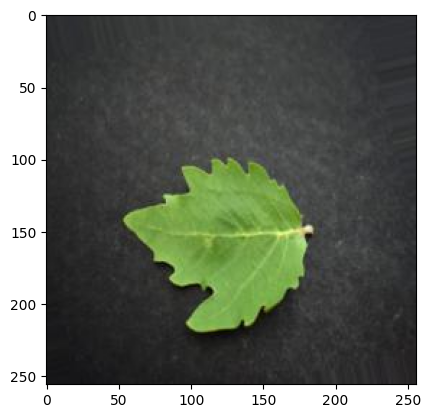

In [ ]:
plt.imshow(train_images[8])

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
test_images.shape

(449, 256, 256, 3)

In [ ]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [ ]:
np.unique(train_labels_encoded)

array([0, 1, 2, 3, 4])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(layers.Conv2D(64, (3, 3),strides=(1, 1),activation='relu', input_shape=(size, size, 3)))
model.add(layers.MaxPooling2D((2, 2),strides=(2, 2)))
model.add(layers.Conv2D(32, (3, 3),strides=(1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2),strides=(2, 2)))
model.add(layers.Conv2D(64, (2, 2),strides=(1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2),strides=(2, 2)))
model.add(layers.Conv2D(32, (2, 2),strides=(1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2),strides=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(5,activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
start = time.time()
model.fit(x_train, y_train, epochs=25,batch_size=32)
stop = time.time()

Epoch 1/25
79/79 [==============================] - 31s 181ms/step - loss: 1.5420 - accuracy: 0.2823
Epoch 2/25
79/79 [==============================] - 12s 158ms/step - loss: 1.1166 - accuracy: 0.5170
Epoch 3/25
79/79 [==============================] - 12s 157ms/step - loss: 0.8336 - accuracy: 0.6643
Epoch 4/25
79/79 [==============================] - 13s 159ms/step - loss: 0.6754 - accuracy: 0.7431
Epoch 5/25
79/79 [==============================] - 12s 158ms/step - loss: 0.5335 - accuracy: 0.7977
Epoch 6/25
79/79 [==============================] - 12s 156ms/step - loss: 0.4364 - accuracy: 0.8468
Epoch 7/25
79/79 [==============================] - 12s 156ms/step - loss: 0.3441 - accuracy: 0.8848
Epoch 8/25
79/79 [==============================] - 12s 156ms/step - loss: 0.3138 - accuracy: 0.8955
Epoch 9/25
79/79 [==============================] - 12s 155ms/step - loss: 0.2590 - accuracy: 0.9121
Epoch 10/25
79/79 [==============================] - 12s 155ms/step - loss: 0.2369 - accura

In [ ]:
print(f"Training time: {stop - start}s")

Training time: 331.0384349822998s


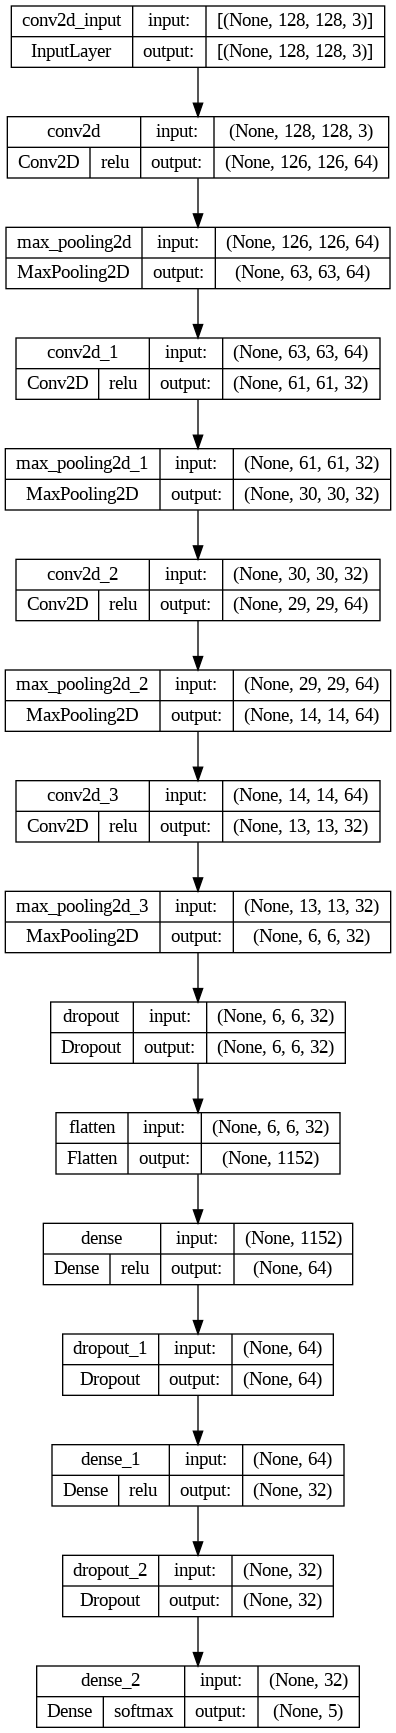

In [ ]:
#tensorflow.keras.utils.plot_model(model, to_file='cnn_model.png', show_shapes=True,show_layer_activations=True)

In [ ]:
predictions=[]
for i in range(len(x_test)):
  predictions.append(np.argmax(model.predict(np.array([x_test[i]]))))

1/1 [==============================] - 0s 22ms/step


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print(accuracy_score(y_test,predictions))
print(precision_score(y_test,predictions,average=None))
print(recall_score(y_test,predictions,average=None))

0.9398663697104677
[1.         0.95918367 0.9875     0.73770492 0.92920354]
[0.86390533 0.97916667 1.         0.9375     1.        ]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       169
           1       1.00      1.00      1.00        48
           2       0.97      0.99      0.98        79
           3       0.85      0.92      0.88        48
           4       0.91      0.99      0.95       105

    accuracy                           0.95       449
   macro avg       0.94      0.96      0.95       449
weighted avg       0.95      0.95      0.95       449



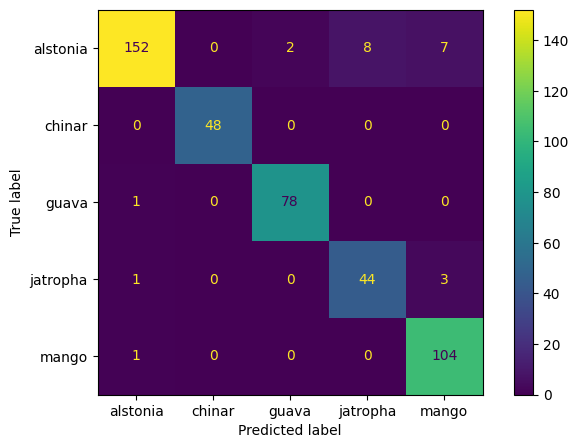

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
heatmap = ConfusionMatrixDisplay(
    confusion_matrix(y_test, predictions),
    display_labels=['alstonia', 'chinar', 'guava', 'jatropha', 'mango'],
)
heatmap.plot(ax=ax)
plt.show();

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(449, 5)

In [ ]:
y_pred = label_binarizer.transform(predictions)

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

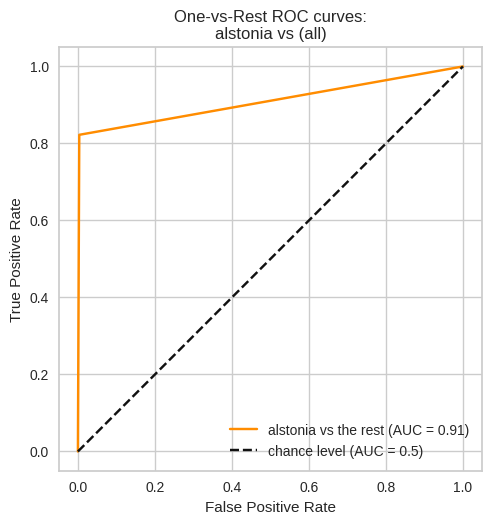

In [ ]:
from sklearn.metrics import RocCurveDisplay

class_of_interest = 0
class_id =np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

RocCurveDisplay.from_predictions(
    y_onehot_test[:,class_id],
    y_pred[:, class_id],
    name=f"alstonia vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nalstonia vs (all)")
plt.legend()
plt.show();

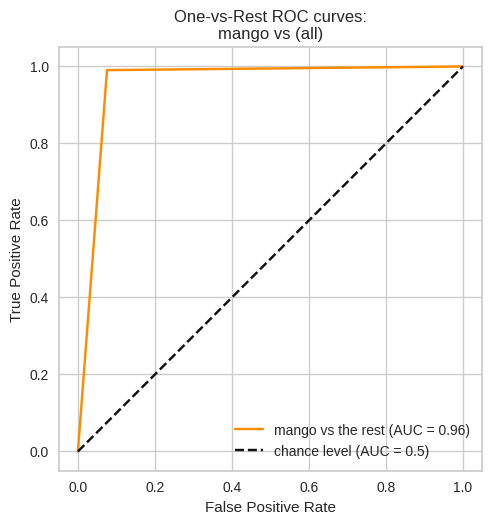

In [ ]:
class_of_interest = 4
class_id =np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

RocCurveDisplay.from_predictions(
    y_onehot_test[:,class_id],
    y_pred[:, class_id],
    name=f"mango vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nmango vs (all)")
plt.legend()
plt.show();

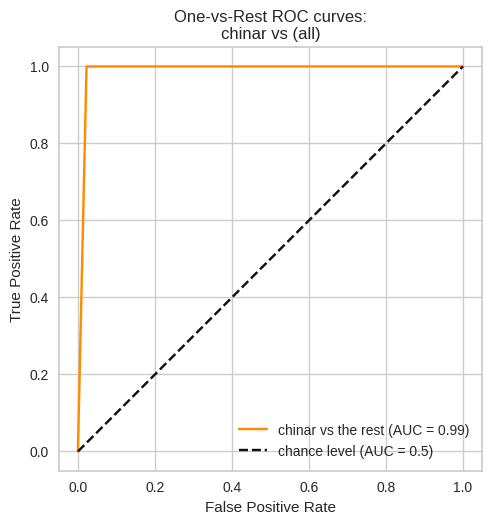

In [ ]:
class_of_interest = 1
class_id =np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

RocCurveDisplay.from_predictions(
    y_onehot_test[:,class_id],
    y_pred[:, class_id],
    name=f"chinar vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nchinar vs (all)")
plt.legend()
plt.show();

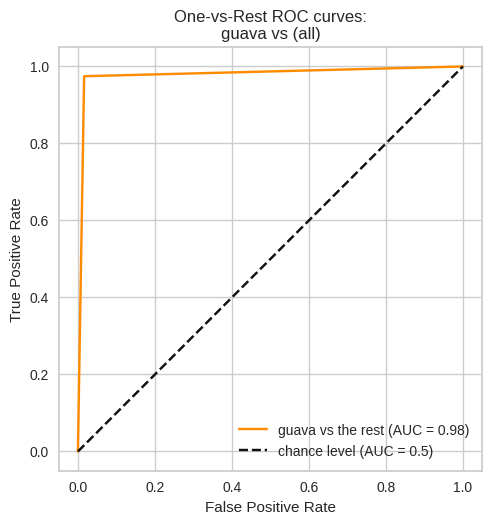

In [ ]:
class_of_interest = 2
class_id =np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

RocCurveDisplay.from_predictions(
    y_onehot_test[:,class_id],
    y_pred[:, class_id],
    name=f"guava vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nguava vs (all)")
plt.legend()
plt.show();

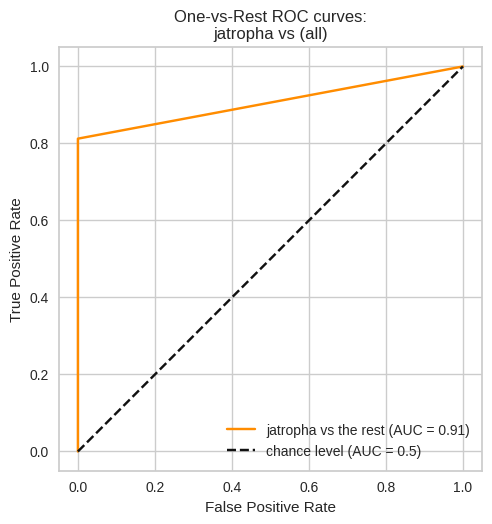

In [ ]:
class_of_interest = 3
class_id =np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

RocCurveDisplay.from_predictions(
    y_onehot_test[:,class_id],
    y_pred[:, class_id],
    name=f"jatropha vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\njatropha vs (all)")
plt.legend()
plt.show();

In [ ]:
converter = tensorflow.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()

In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

# Using pytorch

In [ ]:
import numpy as np
from tqdm import tqdm
from time import time
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torch
from torch.optim import Adam
from torch.nn import CrossEntropyLoss, Conv2d, AvgPool2d, BatchNorm2d, Dropout2d, LeakyReLU, Linear, Module
from torch.utils.data import DataLoader

from torchvision.transforms import transforms
from torchvision.datasets import ImageFolder


In [ ]:
num_epochs = 25
batch_size = 64
learning_rate = 0.001

# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'gpu')

In [ ]:
tfm = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [ ]:
TRAIN_ROOT = "/content/leaves_new/train"
TEST_ROOT = "/content/leaves_new/test"

train_ds = ImageFolder(TRAIN_ROOT, transform = tfm)
test_ds = ImageFolder(TEST_ROOT, transform = tfm)

# Length of Train and Test Datasets
len_train = len(train_ds)
len_test = len(test_ds)

In [ ]:
train_ds.class_to_idx

{'alstonia': 0, 'chinar': 1, 'guava': 2, 'jatropha': 3, 'mango': 4}

In [ ]:
train_loader = DataLoader(train_ds, batch_size = 30, shuffle=True)
test_loader = DataLoader(test_ds, batch_size = 30, shuffle=True)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [ ]:
class CNN(Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = Conv2d(in_channels=3, out_channels=8, kernel_size=(3,3), stride=1, padding=1)
        self.pool = AvgPool2d(kernel_size=(3,3), stride=1)
        self.relu = LeakyReLU()
        self.bn = BatchNorm2d(num_features=8)
        self.drop = Dropout2d(p=0.3)
        self.fc = Linear(in_features=8*126*126, out_features=5)
        
    def forward(self, X):
        output = self.conv(X)
        output = self.pool(output)
        output = self.relu(output)
        output = self.bn(output)
        output = self.drop(output)
#         print(output.shape)
        output = output.view(-1, 8*126*126)
        output = self.fc(output)
        return output

In [ ]:
model = CNN().to(device)

In [ ]:
# Optimiser
optimiser = Adam(model.parameters(), lr=0.0001, weight_decay=0.0001)

# Loss Function
loss_fn = CrossEntropyLoss()

In [ ]:
for epoch in range(10):
    start = time()
    train_acc = 0

# Train
    model.train()
    with tqdm(train_loader, unit="batch") as tepoch:
        for xtrain, ytrain in tepoch:
            optimiser.zero_grad()
            xtrain = xtrain.to(device)
            train_prob = model(xtrain)
            train_prob = train_prob.cpu()
            train_loss = loss_fn(train_prob, ytrain)
            train_loss.backward()
            optimiser.step()
            # END TRAIN
            train_pred = torch.max(train_prob, 1).indices
            train_acc += int(torch.sum(train_pred == ytrain))
            
        train_epoch_accuracy = train_acc / len_train


100%|██████████| 85/85 [06:33<00:00,  4.63s/batch]


In [ ]:
print('tarin_accuracy_percent',(train_acc/len_train)*100)

tarin_accuracy_percent 91.68646080760095


In [ ]:
test_acc = 0
model.eval()
with torch.no_grad():
      for xtest, ytest in test_loader:
          xtest = xtest.to(device)
          test_prob = model(xtest)
          test_prob = test_prob.cpu()
          test_loss = loss_fn(test_prob, ytest)
          test_pred = torch.max(test_prob, 1).indices
          test_acc += int(torch.sum(test_pred == ytest))
        

print('test_accuracy_percent',(test_acc/len_test)*100)

test_accuracy_percent 81.06904231625836
